# Natural Language Processing with Disaster Tweets

Sami treba da najdeme zadaca/dataset

In [2]:
#!pip install tensorflow

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.utils import to_categorical
from imblearn.metrics import classification_report_imbalanced
import matplotlib.pyplot as plt

In [4]:
data_train = pd.read_csv('train.csv', index_col='id')
data_train.head()

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
data_train['keyword'].value_counts()

keyword
fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64

In [6]:
data_train['location'].value_counts()

location
USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: count, Length: 3341, dtype: int64

In [7]:
data_train = data_train.drop(['location'], axis=1)

Ne ni e potrebno lokaciata

In [9]:
missing_values = data_train[data_train['keyword'].isnull()]['target'].value_counts()
missing_values

target
1    42
0    19
Name: count, dtype: int64

In [10]:
data_train[data_train['keyword'].isnull()]

,keyword,text,target
id,,,
1,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
10869,NaN,Two giant cranes holding a bridge collapse int...,1
10870,NaN,@aria_ahrary @TheTawniest The out of control w...,1
10871,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1


ke dropnam 61 redovite 

In [12]:
data_train = data_train.dropna()

In [13]:
data_train.shape

(7552, 3)

In [14]:
enc = LabelEncoder() 
data_train['keyword'] = enc.fit_transform(data_train['keyword'])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data_train['text'],  data_train['keyword'], test_size=0.2)

In [16]:
vectorizer = TfidfVectorizer() 
X_train_tfidf = vectorizer.fit_transform(X_train) 
X_test_tfidf = vectorizer.transform(X_test)

In [17]:
y_train_cat = to_categorical(y_train) 
y_test_cat = to_categorical(y_test)

In [18]:
model = Sequential() 
model.add(Dense(512, input_dim=X_train_tfidf.shape[1], activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(256, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(y_train_cat.shape[1], activation='softmax'))

C:\Users\191045\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [20]:
history = model.fit(X_train_tfidf, y_train_cat, epochs=4, batch_size=32, validation_data=(X_test_tfidf, y_test_cat))

Epoch 1/4
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.0181 - loss: 5.3693 - val_accuracy: 0.1966 - val_loss: 5.0339
Epoch 2/4
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.2294 - loss: 4.5511 - val_accuracy: 0.6056 - val_loss: 3.3039
Epoch 3/4
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.6495 - loss: 2.4078 - val_accuracy: 0.8398 - val_loss: 1.5438
Epoch 4/4
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.8918 - loss: 0.8538 - val_accuracy: 0.8769 - val_loss: 0.9116


In [21]:
loss, accuracy = model.evaluate(X_test_tfidf, y_test_cat)
print(f'Loss: {loss}, Accuracy: {accuracy}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8678 - loss: 0.9365
Loss: 0.9115697741508484, Accuracy: 0.87690269947052


In [22]:
print(f"Training class distributions summary: {Counter(y_train)}")
print(f"Test class distributions summary: {Counter(y_test)}")

Training class distributions summary: Counter({104: 41, 70: 36, 63: 36, 106: 36, 153: 36, 188: 35, 8: 35, 206: 35, 177: 35, 50: 34, 29: 34, 129: 34, 205: 34, 103: 34, 20: 33, 84: 33, 155: 33, 117: 33, 57: 33, 0: 33, 123: 33, 132: 32, 95: 32, 93: 32, 110: 32, 76: 32, 5: 32, 195: 32, 192: 32, 219: 32, 4: 32, 96: 32, 212: 32, 216: 32, 100: 32, 38: 32, 113: 31, 170: 31, 220: 31, 16: 31, 23: 31, 97: 31, 45: 31, 102: 31, 141: 31, 62: 31, 98: 31, 112: 31, 210: 31, 176: 31, 53: 31, 139: 31, 152: 31, 158: 30, 166: 30, 201: 30, 215: 30, 184: 30, 18: 30, 178: 30, 42: 30, 163: 30, 67: 30, 11: 30, 31: 30, 49: 30, 69: 30, 60: 30, 87: 30, 119: 30, 128: 30, 146: 29, 157: 29, 122: 29, 26: 29, 135: 29, 48: 29, 211: 29, 143: 29, 108: 29, 72: 29, 173: 29, 190: 29, 198: 29, 30: 29, 107: 29, 182: 29, 21: 29, 137: 29, 159: 29, 140: 29, 44: 29, 131: 29, 204: 29, 89: 29, 196: 28, 77: 28, 79: 28, 55: 28, 65: 28, 47: 28, 105: 28, 197: 28, 148: 28, 12: 28, 56: 28, 165: 28, 75: 28, 171: 28, 144: 28, 33: 28, 3: 28,

In [28]:
y_pred =model.predict(X_test_tfidf) 
y_pred_classes = y_pred.argmax(axis=-1) 
print(classification_report_imbalanced(y_test, y_pred_classes))

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
                   pre       rec       spe        f1       geo       iba       sup

          0       0.67      0.67      1.00      0.67      0.82      0.64         3
          1       1.00      0.56      1.00      0.71      0.75      0.53         9
          2       0.42      0.83      0.99      0.56      0.91      0.81        12
          3       0.58      1.00      1.00      0.74      1.00      1.00         7
          4       1.00      0.83      1.00      0.91      0.91      0.82         6
          5       1.00      1.00      1.00      1.00      1.00      1.00         2
          6       1.00      0.80      1.00      0.89      0.89      0.78         5
          7       0.86      1.00      1.00      0.92      1.00      1.00         6
          8       1.00      1.00      1.00      1.00      1.00      1.00         7
          9       0.80      0.44      1.00      0.57      0.67      0.42         9
         10       1.00      0.80      1.00     

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


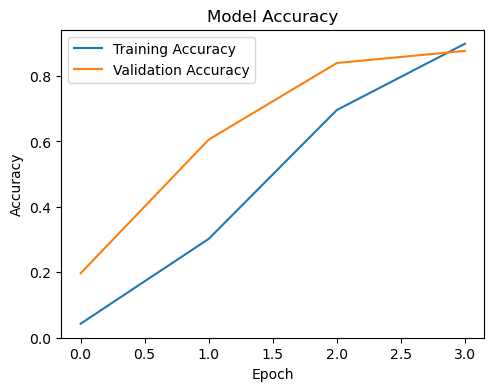

In [26]:
plt.figure(figsize=(12, 4)) 
plt.subplot(1, 2, 1) 
plt.plot(history.history['accuracy'], label='Training Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
plt.title('Model Accuracy') 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend()
plt.show()